In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import joblib


In [2]:
df = pd.read_csv("Mall_Customers.csv")

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

joblib.dump(scaler, "scaler_hc.pkl")


['scaler_hc.pkl']

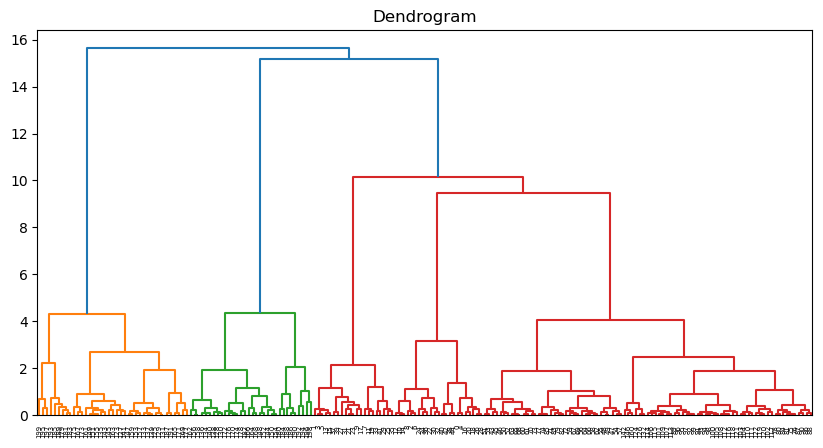

In [4]:
plt.figure(figsize=(10,5))
sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.show()


In [5]:
hc = AgglomerativeClustering(
        n_clusters=5,
        metric='euclidean',
        linkage='ward'
    )

clusters = hc.fit_predict(X_scaled)

df['Cluster'] = clusters


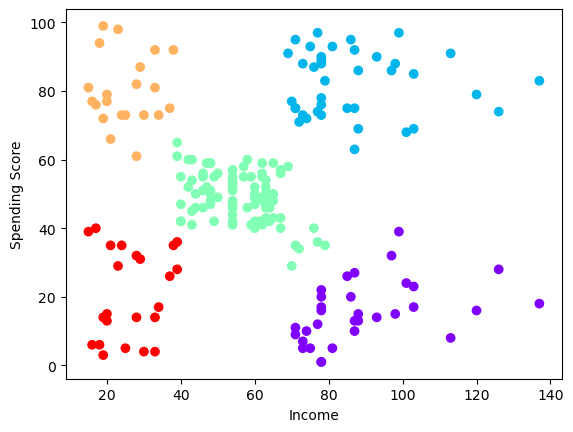

In [6]:
plt.scatter(df['Annual Income (k$)'],
            df['Spending Score (1-100)'],
            c=df['Cluster'],
            cmap='rainbow')

plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()


In [7]:
joblib.dump(hc, "hierarchical_model.pkl")

['hierarchical_model.pkl']